In [63]:
import hvplot.pandas
import pandas as pd

In [64]:
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [65]:
df = pd.read_csv('../data/all_time_league_leaders_2025.03.08.csv')

In [66]:
season_max_gp = df.groupby('SEASON')['GP'].max()

In [67]:
def normalize_season_lengths(row):
    pts = row['PTS']
    max_played = season_max_gp[row['SEASON']]
    return pts * (82 / max_played)

def normalize_games_played(row):
    pts = row['PTS']
    games_played = row['GP']
    return pts * (82 / games_played)

In [68]:
df['PTS_avg'] = df['PTS'] / df['GP']
df['PTS_season_norm'] = df.apply(normalize_season_lengths, axis=1).astype(int)
df['PTS_game_norm'] = df.apply(normalize_games_played, axis=1).astype(int)

In [78]:
top_10_total = df.sort_values(['SEASON', 'PTS'], ascending=[True, False]).groupby('SEASON').head(10).copy()
top_10_season_norm = df.sort_values(['SEASON', 'PTS_season_norm'], ascending=[True, False]).groupby('SEASON').head(10).copy()
top_10_game_norm = df.sort_values(['SEASON', 'PTS_game_norm'], ascending=[True, False]).groupby('SEASON').head(10).copy()
top_10_avg = df[(df['GP'] >= 58) | (df['SEASON'] == 1998)].sort_values(['SEASON', 'PTS_avg'], ascending=[True, False]).groupby('SEASON').head(10).copy()

In [79]:
scoring_title_total = df.sort_values(['SEASON', 'PTS'], ascending=[True, False]).groupby('SEASON').head(1).copy()
scoring_title_season_norm = df.sort_values(['SEASON', 'PTS_season_norm'], ascending=[True, False]).groupby('SEASON').head(1).copy()
scoring_title_game_norm = df.sort_values(['SEASON', 'PTS_game_norm'], ascending=[True, False]).groupby('SEASON').head(1).copy()
scoring_title_avg = df[(df['GP'] >= 58) | (df['SEASON'] == 1998)].sort_values(['SEASON', 'PTS_avg'], ascending=[True, False]).groupby('SEASON').head(1).copy()

In [74]:
(
    scoring_title_total.set_index('SEASON')[['SEASON_STR', 'PLAYER', 'PTS', 'PTS_avg', 'PTS_season_norm', 'PTS_game_norm']].hvplot.line(y='PTS', hover_cols=['SEASON_STR', 'PLAYER', 'PTS', 'PTS_avg', 'PTS_season_norm', 'PTS_game_norm'])
    * scoring_title_avg.set_index('SEASON')[['SEASON_STR', 'PLAYER', 'PTS', 'PTS_avg', 'PTS_season_norm', 'PTS_game_norm']].hvplot.line(y='PTS', hover_cols=['SEASON_STR', 'PLAYER', 'PTS', 'PTS_avg', 'PTS_season_norm', 'PTS_game_norm'])
)

:Overlay
   .Curve.I  :Curve   [SEASON]   (PTS,SEASON_STR,PLAYER,PTS_avg,PTS_season_norm,PTS_game_norm)
   .Curve.II :Curve   [SEASON]   (PTS,SEASON_STR,PLAYER,PTS_avg,PTS_season_norm,PTS_game_norm)

In [75]:
scoring_title_total.groupby('PLAYER')['PLAYER'].count().sort_values(ascending=False).head(10)

PLAYER
Michael Jordan         11
Wilt Chamberlain        7
Kevin Durant            5
Kobe Bryant             4
George Gervin           4
James Harden            4
Kareem Abdul-Jabbar     3
Shaquille O'Neal        3
Bob McAdoo              3
Neil Johnston           3
Name: PLAYER, dtype: int64

In [ ]:
scoring_title_avg.groupby('PLAYER')['PLAYER'].count().sort_values(ascending=False).head(10)

PLAYER
Michael Jordan         10
Wilt Chamberlain        7
Allen Iverson           4
George Gervin           4
Kevin Durant            4
Bob McAdoo              3
Neil Johnston           3
James Harden            3
Kareem Abdul-Jabbar     2
Tracy McGrady           2
Name: PLAYER, dtype: int64

In [83]:
top_10_avg.groupby('SEASON')['GP'].mean().hvplot.line() * season_max_gp.hvplot.line()

:Overlay
   .Curve.GP.I  :Curve   [SEASON]   (GP)
   .Curve.GP.II :Curve   [SEASON]   (GP)

In [85]:
(top_10_avg.groupby('SEASON')['GP'].mean() / season_max_gp).hvplot.line()

:Curve   [SEASON]   (GP)

<Axes: xlabel='SEASON'>

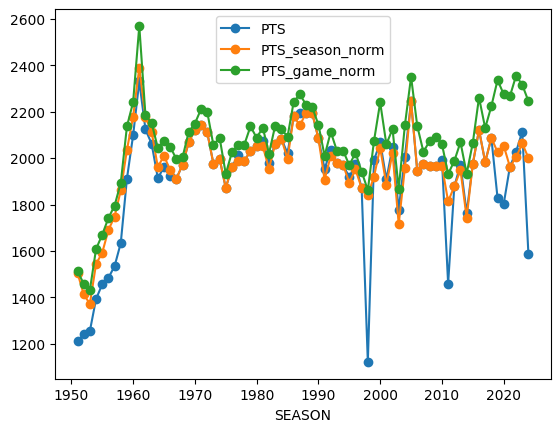

In [35]:
top_10.groupby('SEASON')[['PTS', 'PTS_season_norm', 'PTS_game_norm']].mean().plot(marker='o')

In [34]:
df[df['SEASON'] == 2011]

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,SEASON_STR,SEASON
16667,201142,1,Kevin Durant,1610612760,OKC,66,2546,643,1297,0.496,...,88.0,77.0,248.0,133,1850,1801,0.93,0.35,2011-12,2011
16668,2544,2,LeBron James,1610612748,MIA,62,2326,621,1169,0.531,...,115.0,50.0,213.0,96,1683,1851,1.82,0.54,2011-12,2011
16669,977,3,Kobe Bryant,1610612747,LAL,58,2232,574,1336,0.430,...,69.0,18.0,204.0,105,1616,1244,1.29,0.34,2011-12,2011
16670,201566,4,Russell Westbrook,1610612760,OKC,66,2331,578,1266,0.457,...,112.0,21.0,239.0,147,1558,1354,1.51,0.47,2011-12,2011
16671,201567,5,Kevin Love,1610612750,MIN,55,2145,474,1059,0.448,...,47.0,28.0,128.0,152,1432,1558,0.87,0.37,2011-12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,202952,474,Malcolm Thomas,1610612759,SAS,3,15,0,3,0.000,...,1.0,1.0,0.0,0,1,3,0.00,0.00,2011-12,2011
17141,1730,475,Brian Skinner,1610612763,MEM,1,4,0,1,0.000,...,0.0,0.0,0.0,1,0,-1,0.00,0.00,2011-12,2011
17142,2429,475,Dan Gadzuric,1610612752,NYK,2,13,0,2,0.000,...,1.0,1.0,1.0,4,0,2,0.00,1.00,2011-12,2011
17143,202380,475,Hamady Ndiaye,1610612764,WAS,3,3,0,1,0.000,...,0.0,0.0,0.0,0,0,-1,0.00,0.00,2011-12,2011
